In [1]:
from ptolemy.Ptolemy import Ptolemy
from ptolemy.mrc import load_mrc
from ptolemy.visualization import viz_image

In [2]:
ptolemy = Ptolemy()

In [3]:
ex = load_mrc('example_images/med_mag/21feb25a_23139789.mrc')

In [4]:
ptolemy.update_noice_hole_intensity(8.20152)

In [5]:
outputs = ptolemy.process_mm_image(ex)

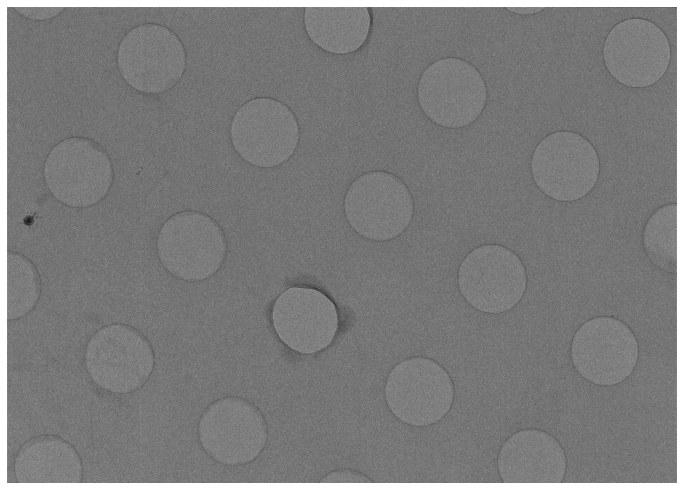

In [6]:
viz_image(ex)

In [ ]:
viz_image(ex, )

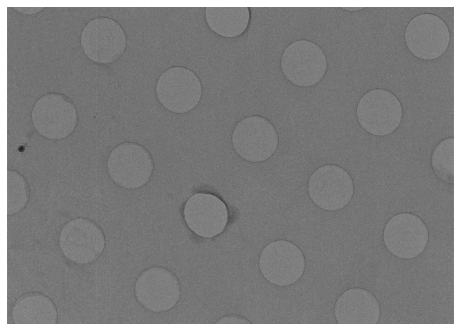

In [4]:
ex = Exposure(ex)
ex.viz_image()

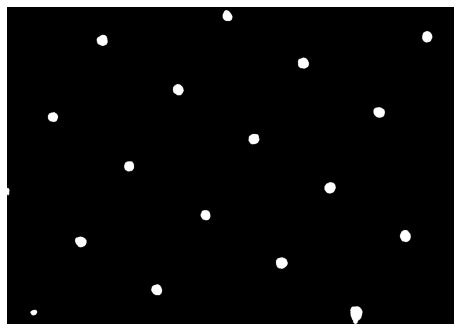

In [5]:
segmenter = algorithms.UNet_Segmenter(64, 9, model_path='weights/211026_unet_9x64_ep6.torchmodel')
ex.make_mask(segmenter)
ex.viz_mask()

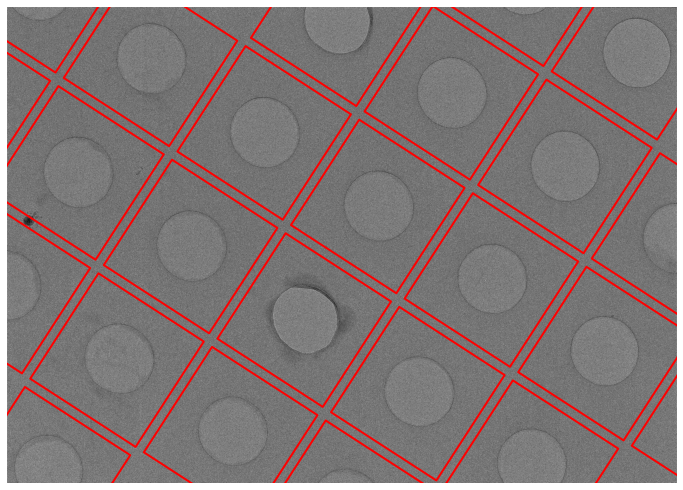

In [6]:
processor = algorithms.MedMag_Process_Mask(edge_tolerance=100)
ex.process_mask(processor)
ex.viz_boxes()

In [8]:
cropper = algorithms.MedMag_Process_Crops()
ex.get_crops(cropper)
model = models.AveragePoolModel(4, 128)
model.load_state_dict(torch.load('weights/211214_medmag_128x4_avgpool_e5.torchmodel'))
wrapper = models.Wrapper(model)
ex.score_crops(wrapper, final=False)

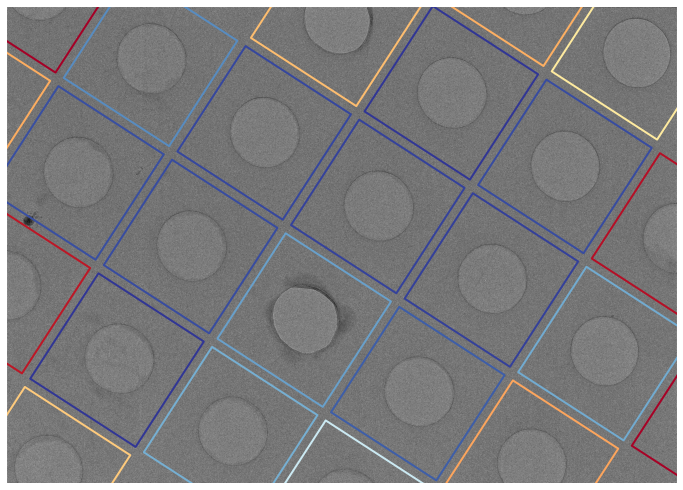

In [9]:
ex.viz_boxes_and_scores()

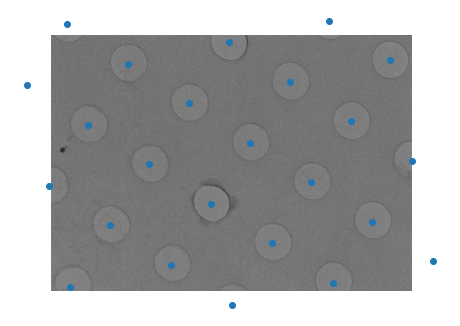

In [11]:
ex.viz_image_centers()